Dataset Description:
The dataset contains information about properties. Each property has a unique property ID and is associated with a location ID based on the subcategory of the city. The dataset includes the following attributes:

Property ID: Unique identifier for each property.
Location ID: Unique identifier for each location within a city.
Page URL: The URL of the webpage where the property was published.
Property Type: Categorization of the property into six types: House, FarmHouse, Upper Portion, Lower Portion, Flat, or Room.
Price: The price of the property, which is the dependent feature in this dataset.
City: The city where the property is located. The dataset includes five cities: Lahore, Karachi, Faisalabad, Rawalpindi, and Islamabad.
Province: The state or province where the city is located.
Location: Different types of locations within each city.
Latitude and Longitude: Geographic coordinates of the cities

# **1. Dataset Description and Why It Is Interesting**

## **Domain**
The dataset belongs to the **real estate domain**, specifically the **Pakistan housing market**.  
It contains detailed information about properties listed for sale or rent on the Zameen.com website.  
Real estate price prediction is a high-value problem because accurate estimates help buyers, sellers, developers, and investors make informed decisions.

---

## **Features Overview**
The dataset contains **168,446 rows** and **20 features**, covering different categories:

### **1. Numerical Features**
- `price` (Target variable)
- `latitude`
- `longitude`
- `baths`
- `bedrooms`
- `Area Size`

### **2. Categorical Features**
- `property_type`
- `location`
- `city`
- `province_name`
- `area`
- `purpose` (For Sale / For Rent)
- `agency`
- `agent`
- `Area Type` (Marla / Kanal)
- `Area Category`
- `date_added`

### **3. Identifier / URL Features**
- `property_id`
- `location_id`
- `page_url`

---

## **Percentage of Missing Values**

- We added 10% artificial nulls for each column as per your instructions. You will find it below.
- After our insertions: the whole dataset has **11.85%** nulls, 2 columns have **33.52%** nulls and all other columns have **10%**.

This makes the dataset relatively **clean** compared to typical real-estate datasets.

---

## **Outliers**
Yes, the dataset contains clear outliers:

- `price` ranges up to **2 billion PKR**, indicating extreme luxury properties.
- `Area Size` goes up to **800 Marla**, while typical houses fall between **5–20 Marla**.
- Number of bathrooms and bedrooms also contains extreme values (e.g., 10+ baths).

These outliers will need to be handled before modeling (log-transform or removal).

---

## **Dimensionality**
- **Instances (Rows):** ~168,446  
- **Features (Columns):** 20  

---

## **Target Variable**
- The dataset is a **regression** dataset.
- **Target variable:** `price` (continuous numeric field)
- Goal: **Predict house prices** using the other features.

This makes the problem interesting for:
- Real-estate valuation
- Predictive modeling
- Investment analysis

---

## **Why This Dataset is Interesting**
1. **Real-world relevance** — Housing prices impact people’s lives, investment decisions, and economy.
2. **Rich feature set** — Includes location, size, purpose, agency, bedrooms, and more.
3. **Large dataset** — Over 168k records.
6. **Multiple property types** — Houses, flats, commercial units.


---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [7]:
df = pd.read_csv(r"C:\Users\user\Documents\Machine Learning Project\Pakistan House Prices.csv")
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [85]:
df.shape

(168446, 20)

In [86]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [87]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [91]:
df.duplicated().sum()

0

## Adding 10% artificial nulls to each column

In [95]:
import pandas as pd
import numpy as np

null_fraction = 0.1  # 10% missing values
np.random.seed(42)    # for reproducibility

target_col = 'price'      # the target column
cols_to_null = [c for c in df.columns if c != target_col]   # all except target

for col in cols_to_null:
    n_nulls = int(null_fraction * len(df))
    null_indices = np.random.choice(df.index, n_nulls, replace=False)
    df.loc[null_indices, col] = np.nan


In [97]:
df.isnull().sum()

property_id      16844
location_id      16844
page_url         16844
property_type    16844
price                0
location         16844
city             16844
province_name    16844
latitude         16844
longitude        16844
baths            16844
area             16844
purpose          16844
bedrooms         16844
date_added       16844
agency           56553
agent            56469
Area Type        16844
Area Size        16844
Area Category    16844
dtype: int64

### Percentage of nulls in each column

In [100]:
(df.isna().mean() * 100).round(2)

property_id      10.00
location_id      10.00
page_url         10.00
property_type    10.00
price             0.00
location         10.00
city             10.00
province_name    10.00
latitude         10.00
longitude        10.00
baths            10.00
area             10.00
purpose          10.00
bedrooms         10.00
date_added       10.00
agency           33.57
agent            33.52
Area Type        10.00
Area Size        10.00
Area Category    10.00
dtype: float64

### Percentage of nulls in the whole dataset

In [102]:
total_null_percentage = (df.isna().sum().sum() / df.size) * 100
total_null_percentage

11.854540921126059

# Outliers

In [107]:
num_cols = ["price", "Area Size", "baths", "bedrooms"]
df[num_cols].describe()


,price,Area Size,baths,bedrooms
count,1.684460e+05,151602.000000,151602.000000,151602.000000
mean,1.776576e+07,5.888863,2.872198,3.177986
std,3.531003e+07,5.808184,2.485187,1.969953
min,0.000000e+00,0.000000,0.000000,0.000000
25%,1.750000e+05,3.000000,0.000000,2.000000
50%,8.500000e+06,5.000000,3.000000,3.000000
75%,1.950000e+07,8.000000,4.000000,4.000000
max,2.000000e+09,800.000000,403.000000,68.000000


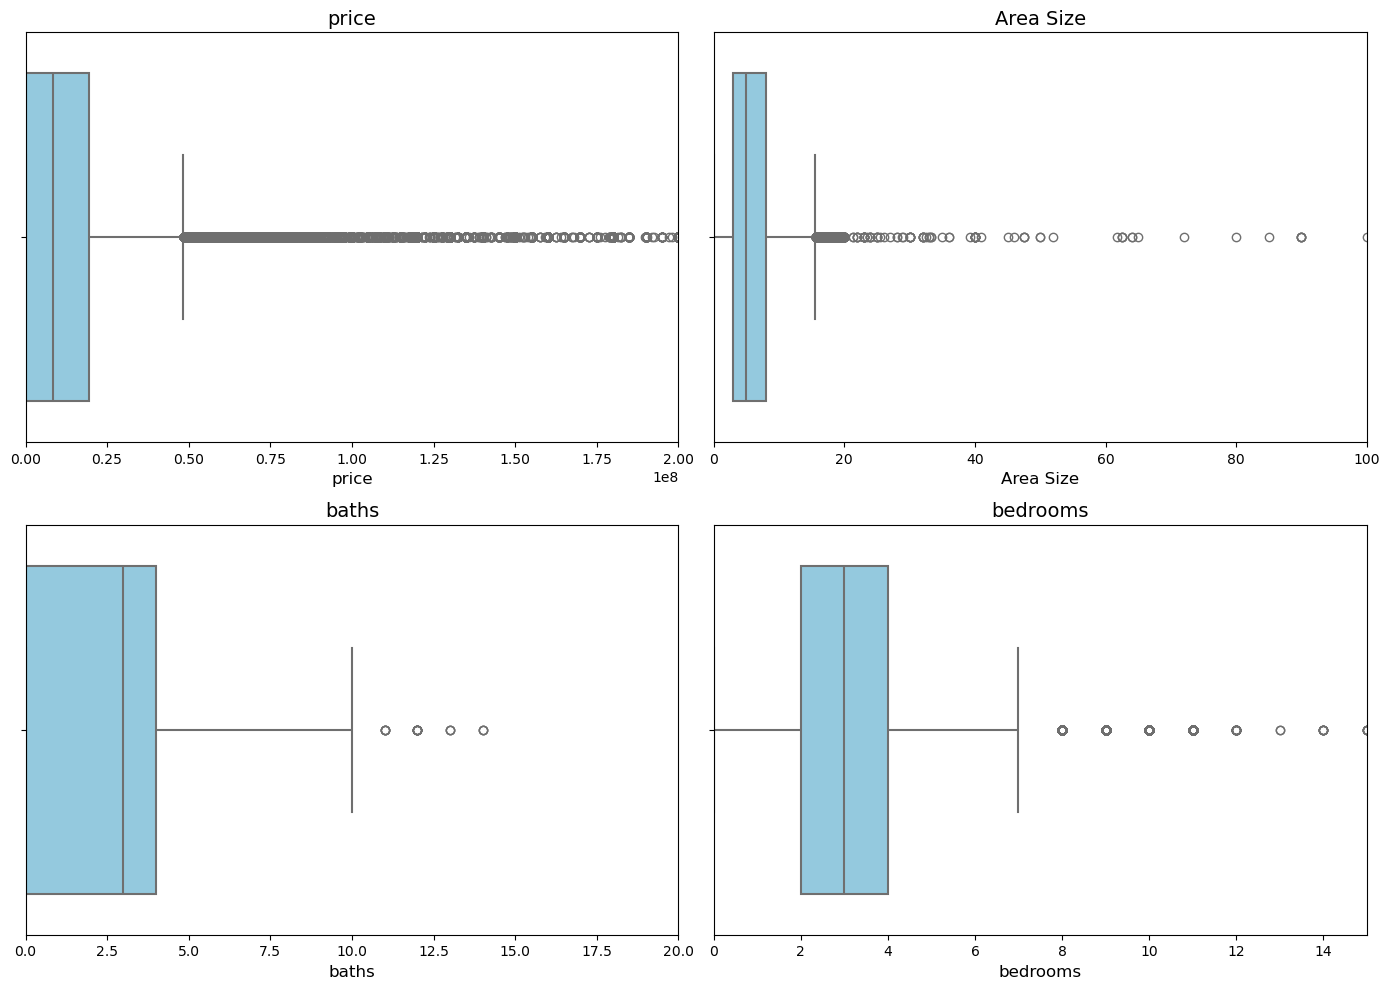

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

zoom_limits = {
    "price": (0, 2e8),        # zoom to 200 million
    "Area Size": (0, 100),    # zoom to 100 Marla
    "baths": (0, 20),         # zoom to 20 baths
    "bedrooms": (0, 15)       # zoom to 15 bedrooms
}

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        x=df[col],
        color='skyblue',
        linewidth=1.5,
        showfliers=True
    )
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Apply zoom (x-limits)
    plt.xlim(zoom_limits[col])

plt.tight_layout()
plt.show()


## Insights from Boxplots of Numerical Features

The boxplots for the numerical variables reveal several important characteristics about the dataset:

### **1. Price**
- The price distribution is highly right-skewed, with most properties priced in the lower range.
- A large number of observations appear as clear outliers, stretching far beyond the upper whisker.
- These outliers likely represent luxury villas, commercial properties, and premium real estate with exceptionally high market values.

### **2. Area Size**
- The majority of homes fall between **3 to 10 Marla**, indicating typical residential unit sizes.
- However, the presence of points extending up to **100 Marla and above** shows outliers.
- 
### **3. Baths**
- Most properties contain **2 to 4 bathrooms**, forming a compact central box.
- Several outlier points appear around **10 to 15 bathrooms**, which are unusual for standard homes.
- These likely reflect estates, guest houses, multi-family units, or something very big in general.

### **4. Bedrooms**
- The typical distribution centers around **2 to 4 bedrooms**, consistent with standard residential housing.
- Outliers extend up to **15 bedrooms**, indicating the presence of **mansions, hostels, or very large residential units**.
- The clear separation of these points from the main box confirms the existence of larger values.




# Visualizations

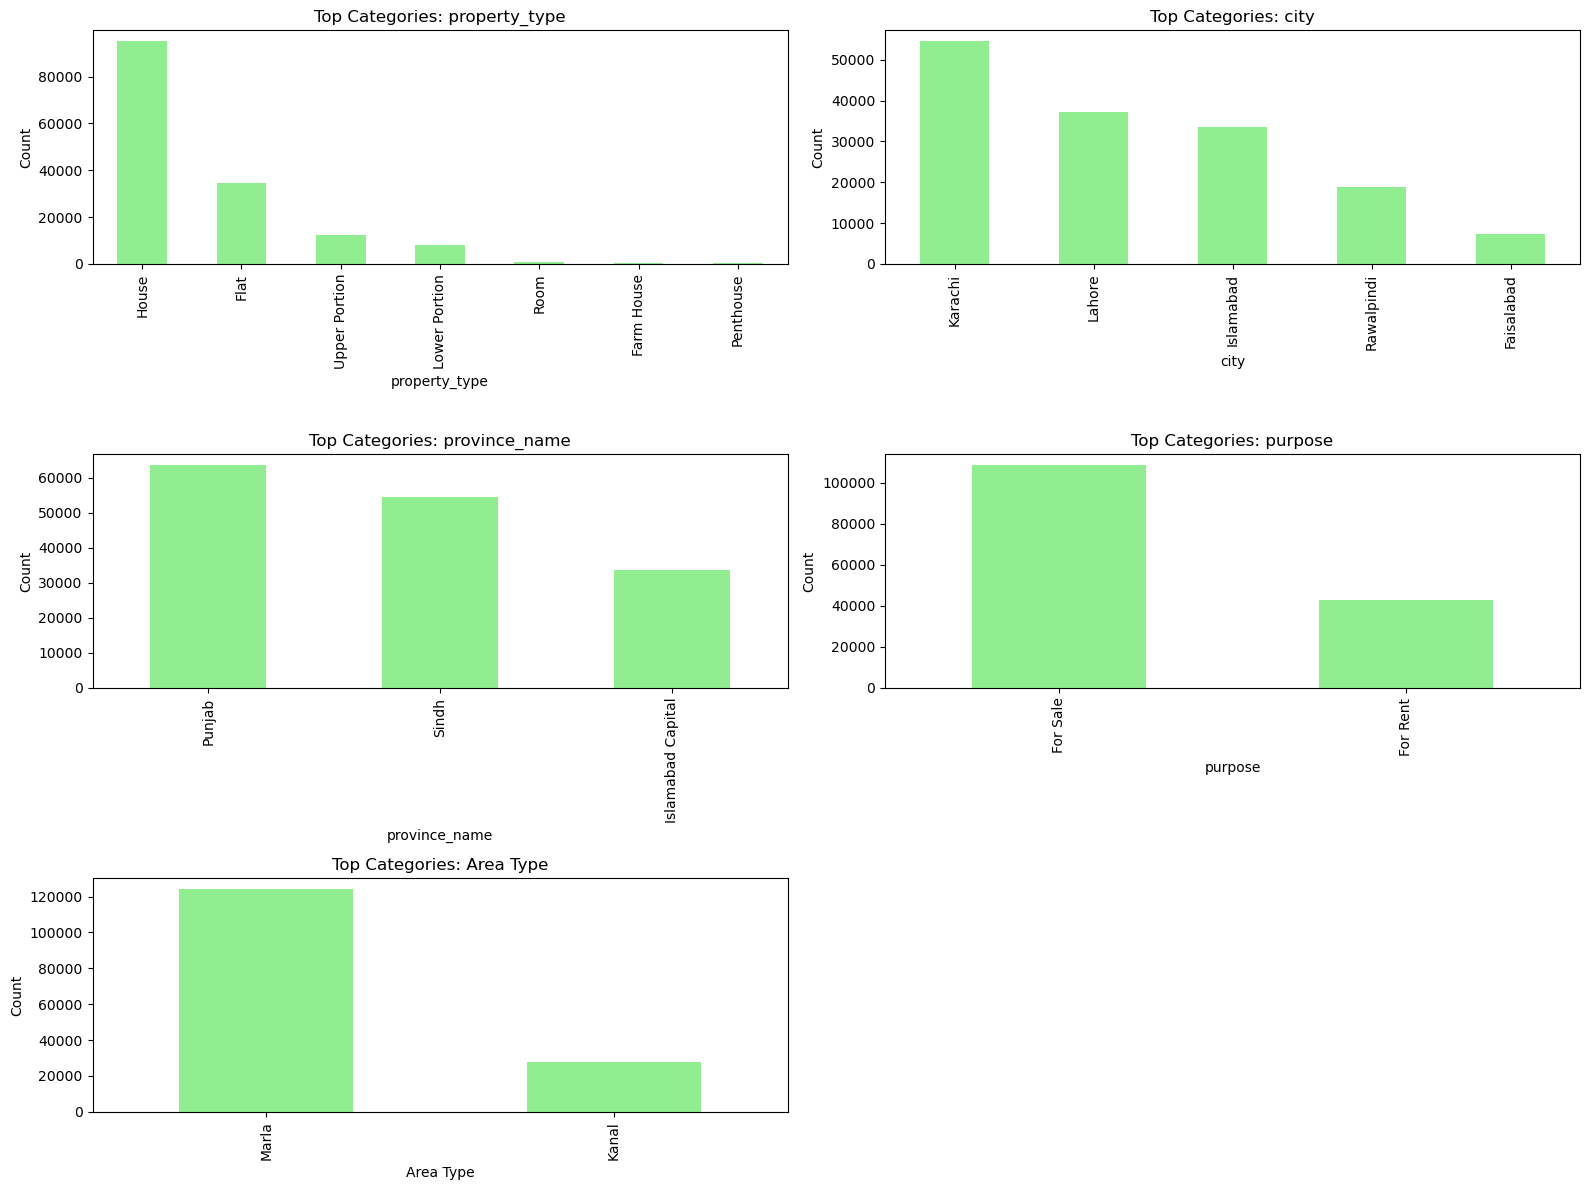

In [113]:
cat_cols = ["property_type", "city", "province_name", "purpose", "Area Type"]

plt.figure(figsize=(16, 12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    df[col].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title(f"Top Categories: {col}")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Insights

- **Property Type:** Houses are the most common property type, followed by flats, indicating the dataset is mainly focused on residential housing.

- **City:** Most listings come from major cities—especially **Karachi**, **Lahore**, and **Islamabad**—showing strong urban market representation.

- **Province:** Punjab and Sindh contribute the largest share of listings, reflecting Pakistan’s population and real estate density.

- **Purpose:** The majority of properties are **For Sale**, meaning the dataset is primarily suited for sale price prediction.

- **Area Type:** **Marla** is the most frequently used area measurement unit, confirming the focus on standard-sized residential plots.

Overall, the dataset is dominated by **residential properties for sale in major urban regions**, especially in Punjab and Sindh.


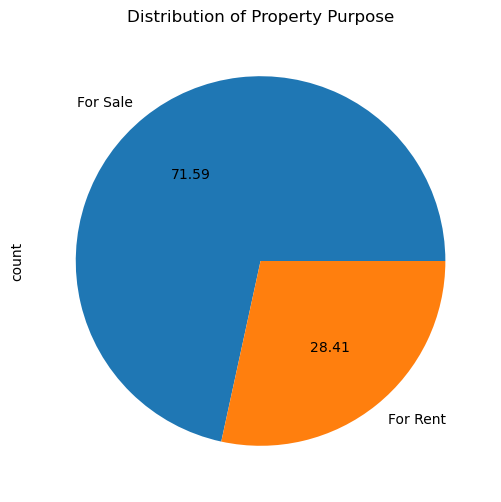

In [116]:
df['purpose'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(6,6))
plt.title('Distribution of Property Purpose')
plt.show()


## Insights 

The pie chart illustrates the distribution of property listings based on their purpose: **For Sale** vs **For Rent**.

- For Sale properties dominate the dataset, making up approximately **71.63%** of all listings.
- For Rent properties account for only 28.37%, a much smaller proportion.
- This significant imbalance indicates that the dataset is primarily focused on sale transactions, reflecting the behavior of Pakistan’s real estate market where buying and selling activities are more frequently advertised than rentals.


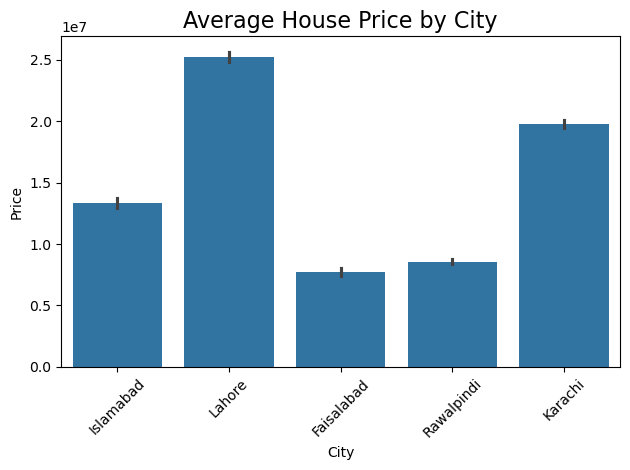

In [120]:
#EDA to understand prices per city
sns.barplot(x='city',y='price', data = df)
plt.title("Average House Price by City", fontsize=16)
plt.xlabel("City")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights

- **Lahore** has the highest average property prices among the examined cities.
- **Karachi** follows as the second most expensive market.
- **Islamabad** has moderate average prices, lower than Lahore and Karachi.
- **Faisalabad and Rawalpindi** have the lowest average house prices, indicating more affordable markets.
- Overall, the plot shows a clear variation in pricing across major cities, reflecting differences in demand, development, and market conditions.


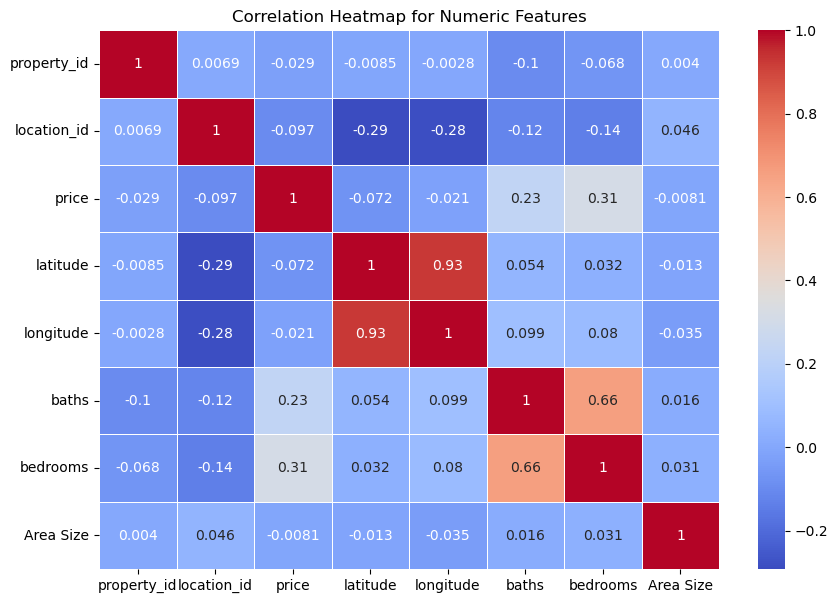

In [123]:
plt.figure(figsize=(10,7))
numeric = df.select_dtypes(include=['int64', 'float64'])
corr = numeric.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


## Insights

- The correlation matrix shows weak correlations between most numerical features.
- price has its strongest correlations with:
  - **bedrooms (0.31)**
  - **baths (0.23)**
- latitude and longitude have a very high correlation (**0.93**), which makes sense since they represent geographic coordinates.
- baths and bedrooms are also strongly correlated (**0.67**) because larger homes typically include more rooms and bathrooms.
- Most other relationships show correlations close to **zero**, indicating that the numeric features are largely independent.


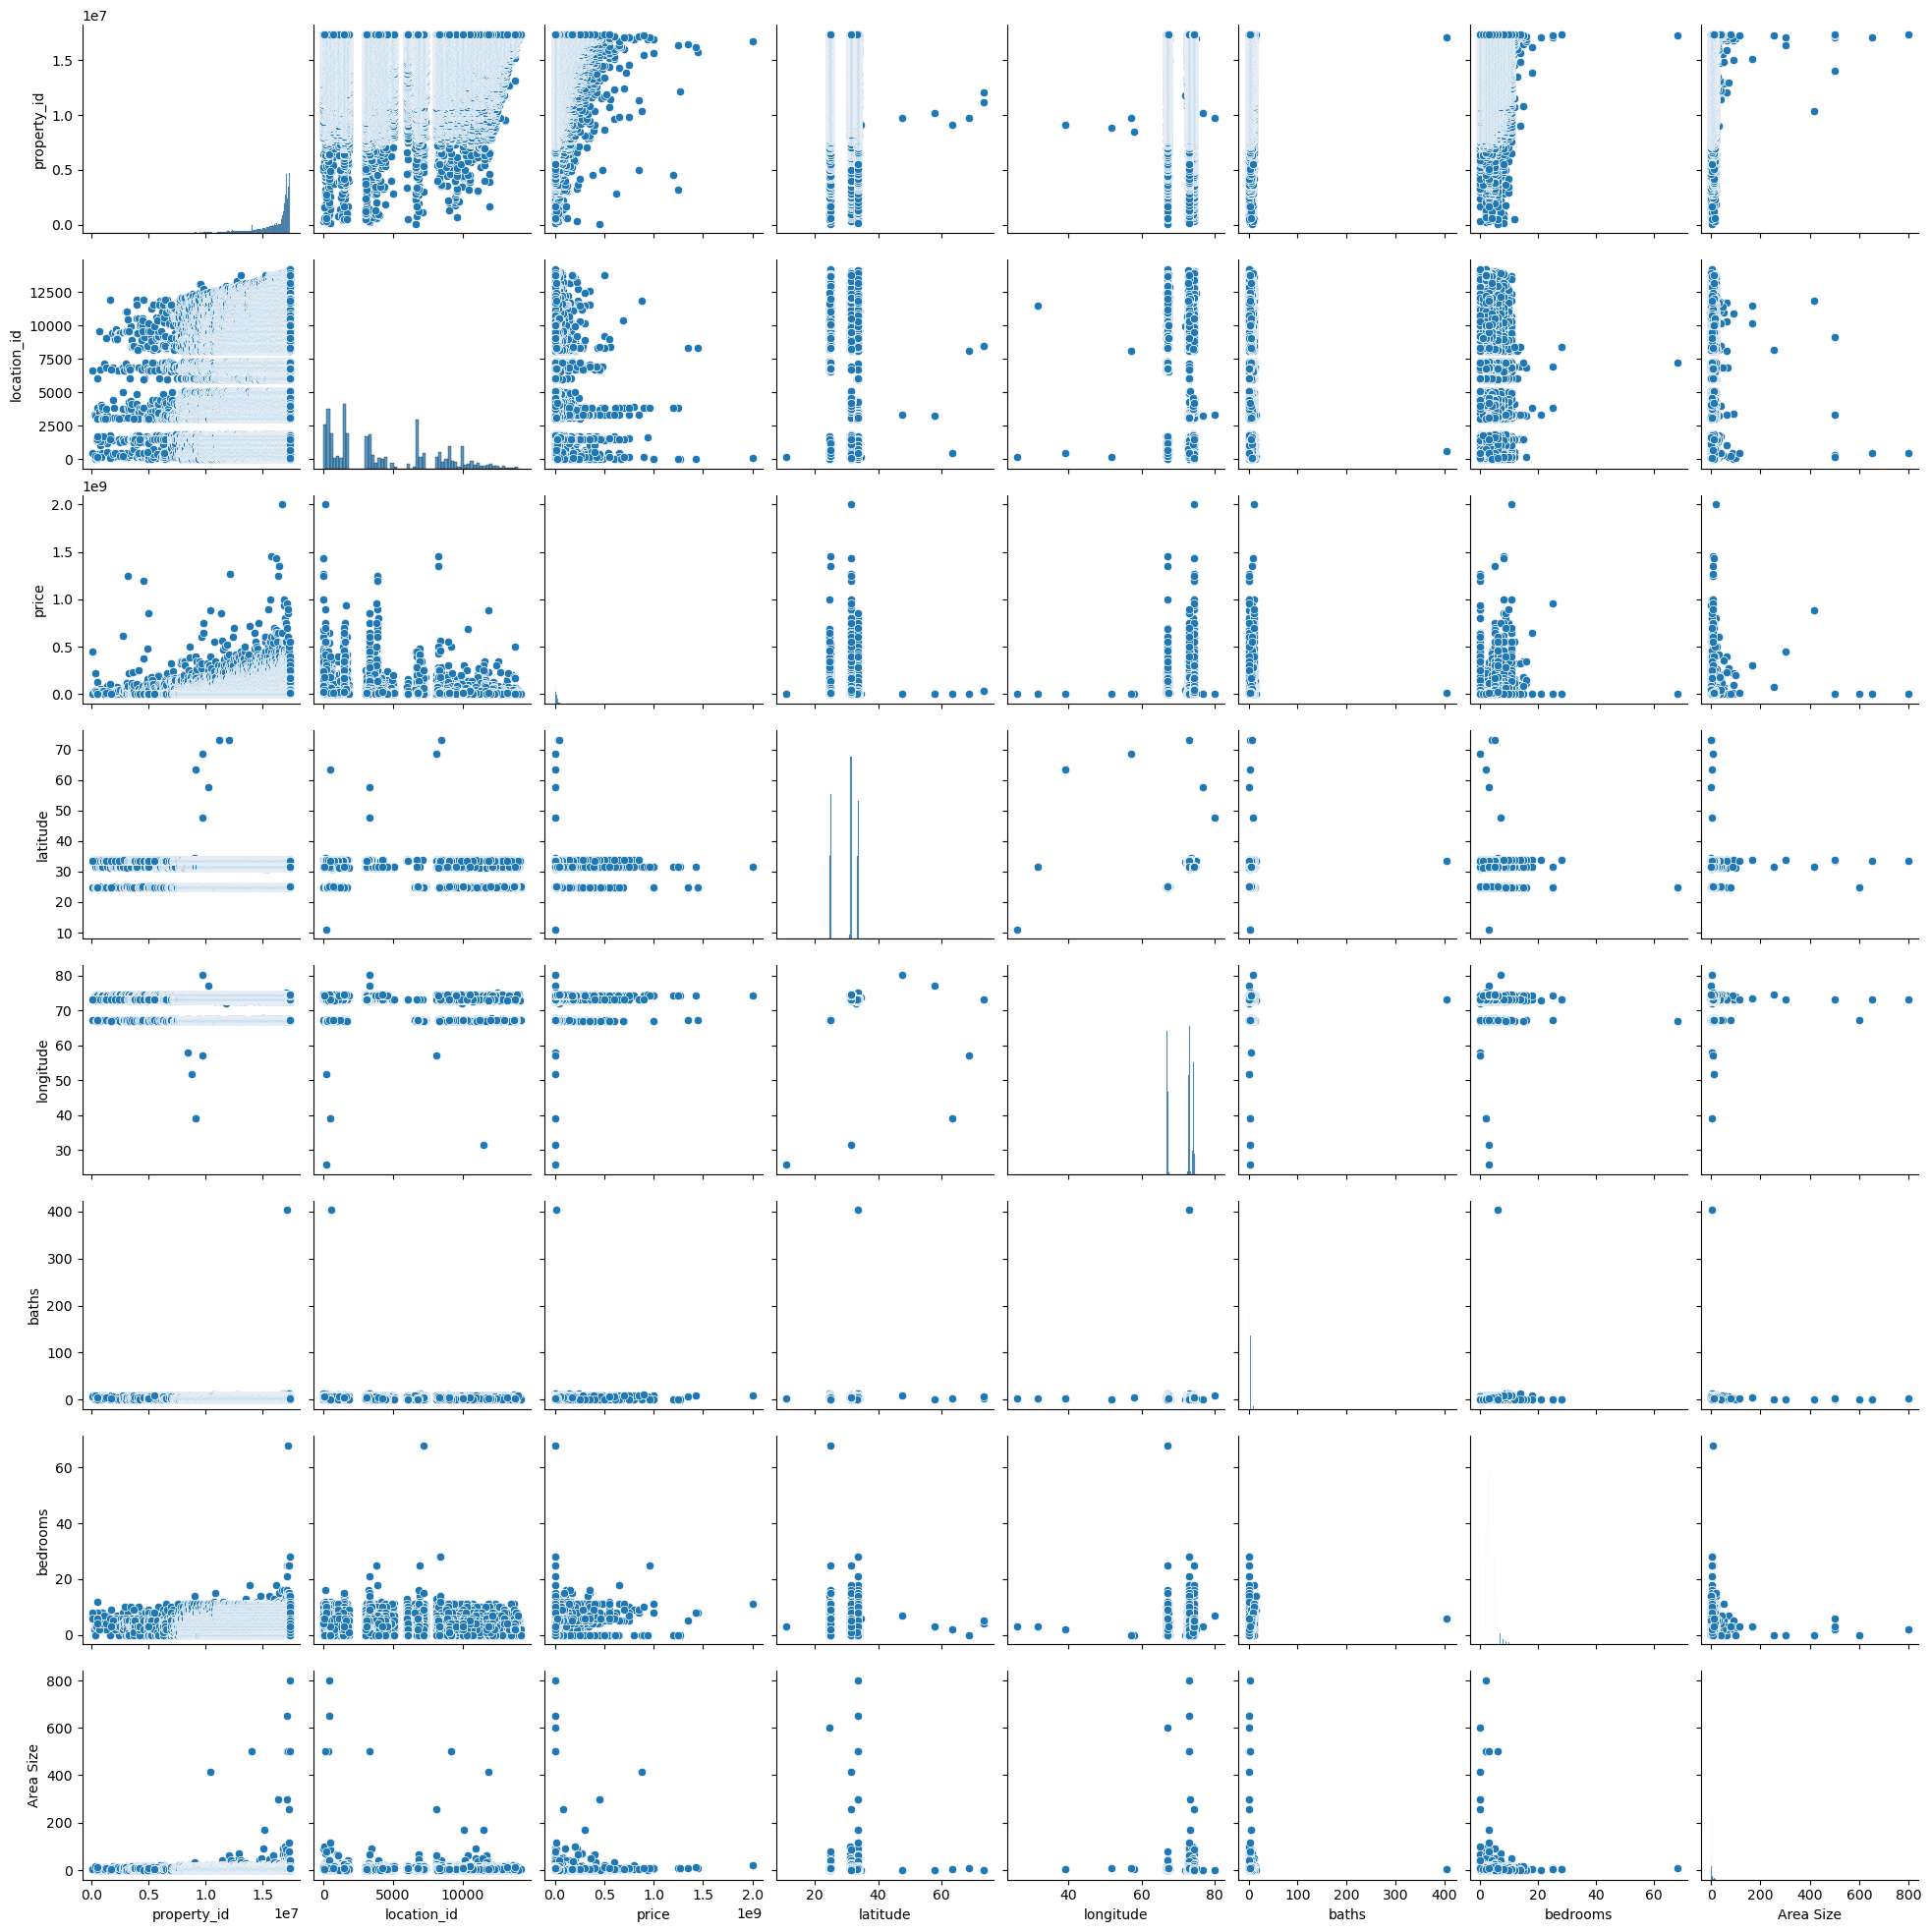

In [126]:
sns.pairplot(df)
plt.show()

## Insights

- The pairplot shows the relationships between all numerical variables through scatterplots and diagonal distributions.
- Strong patterns appear between:
  - **Latitude and longitude**, forming a clear linear geographic alignment.
  - **Bedrooms and baths**, showing a natural positive relationship.
- **price** does not form strong linear patterns with most other features, reflecting the complexity and variability of real estate pricing.
- Many plots appear dense and compressed due to extreme outliers, especially for **price**, **Area Size**, and **baths**.


In [9]:
label_encoders = {}
categoricals = df.select_dtypes(include=['object']).columns
for col in categoricals:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
df = df.fillna(df.median(numeric_only=True))


In [13]:
X = df.drop('price', axis=1)   # drop target column 
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Decision Tree Reggressor**

In [158]:
sbs_dt = SFS(
    estimator= DecisionTreeRegressor(random_state=42),
    k_features="best",  # search from 5 features up to all
    forward=False,  # backward selection
    scoring='r2',
    cv=5,
    n_jobs=-1
)
sbs_dt.fit(X_train, y_train)
selected_idx_dt = list(sbs_dt.k_feature_idx_)

selected_features = X_train.columns[selected_idx_dt].tolist()

print("Decision Tree Selected Features:", selected_features)
print(f"Decision Tree Best R²: {sbs_dt.k_score_:.4f}")

Decision Tree Selected Features: ['longitude', 'area', 'purpose', 'Area Category']
Decision Tree Best R²: 0.5925


In [159]:
# Update X_train and X_test to only include selected features
X_train_sbs = X_train[selected_features]
X_test_sbs = X_test[selected_features]

In [160]:
gridSearch = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid={ 
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    cv=5,
    scoring='r2',
    n_jobs=-1
).fit(X_train_sbs, y_train)

print("Best Params (Decision Tree):", gridSearch.best_params_)


Best Params (Decision Tree): {'max_depth': 10, 'min_samples_split': 10}


In [161]:
dt_reg = DecisionTreeRegressor( max_depth=10,min_samples_split= 2, random_state=42)
dt_reg.fit(X_train_sbs, y_train)

y_pred = dt_reg.predict(X_test_sbs)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 6776667.0785
Mean Squared Error (MSE): 421300888723184.5000
R² Score: 0.6365


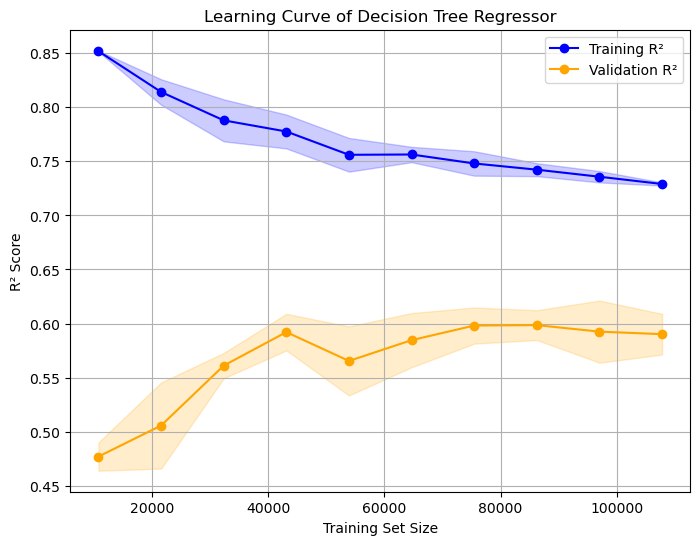

In [162]:
train_sizes, train_scores, test_scores = learning_curve(
    dt_reg, X_train_sbs, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training R²')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation R²')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.title("Learning Curve of Decision Tree Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# **Linear Regression**

In [17]:
from sklearn.impute import SimpleImputer

# 1) Identify numeric & categorical (may be empty)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 2) Impute numeric columns
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# 3) Only impute categorical if they exist
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [201]:
sbs_lr = SFS(
    estimator=LinearRegression(),
    k_features="best",   # automatically pick best number of features
    forward=False,       # backward selection
    scoring='r2',
    cv=5,
    n_jobs=-1
)

sbs_lr.fit(X_train, y_train)

selected_idx_lr = list(sbs_lr.k_feature_idx_)
selected_features = X_train.columns[selected_idx_lr].tolist()

print("Linear Regression Selected Features:", selected_features)
print(f"Linear Regression Best R²: {sbs_lr.k_score_:.4f}")

Linear Regression Selected Features: ['property_id', 'location_id', 'page_url', 'property_type', 'location', 'province_name', 'latitude', 'baths', 'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Area Type', 'Area Size', 'Area Category']
Linear Regression Best R²: 0.1973


In [203]:
X_train_sbs = X_train[selected_features]
X_test_sbs = X_test[selected_features]

In [205]:
grid_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid={
    'fit_intercept': [True, False],
    'positive': [True, False]},
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_lr.fit(X_train_sbs, y_train)

print("Best Params (Linear Regression):", grid_lr.best_params_)

Best Params (Linear Regression): {'fit_intercept': True, 'positive': False}


In [207]:
lr_reg = LinearRegression(fit_intercept= True, positive= False)
lr_reg.fit(X_train_sbs, y_train)

y_pred = lr_reg.predict(X_test_sbs)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 14825862.9080
Mean Squared Error (MSE): 931144006279693.7500
R² Score: 0.1967


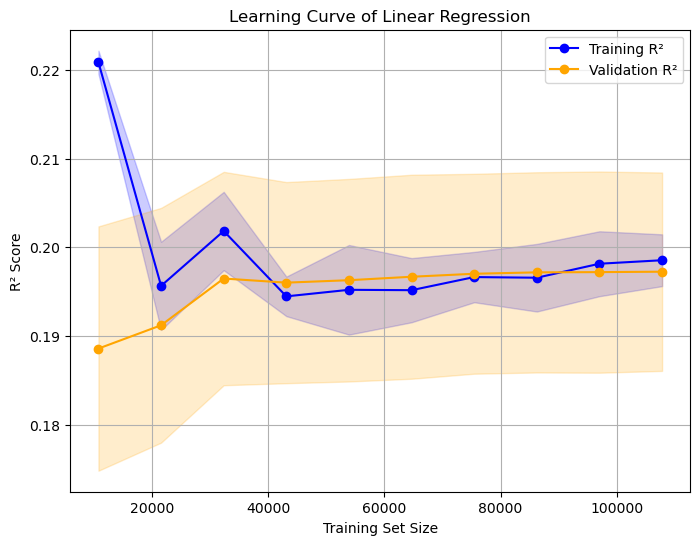

In [209]:
train_sizes, train_scores, test_scores = learning_curve(
    lr_reg, X_train_sbs, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training R²')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation R²')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.title("Learning Curve of Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# **K nearest neighbor regressor**

In [19]:
sbs_knn = SFS(
    estimator=KNeighborsRegressor(),
    k_features="best",   # automatically pick best number of features
    forward=False,       # backward selection
    scoring='r2',
    cv=5,
    n_jobs=1
)

sbs_knn.fit(X_train, y_train)


selected_idx_knn = list(sbs_knn.k_feature_idx_)
selected_features = X_train.columns[selected_idx_knn].tolist()

print("KNN Selected Features:", selected_features)
print(f"KNN Best R² (SBS): {sbs_knn.k_score_:.4f}")

C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

KNN Selected Features: ['property_type', 'latitude', 'longitude', 'purpose', 'Area Type', 'Area Size']
KNN Best R² (SBS): 0.7666


In [20]:
X_train_sbs = X_train[selected_features]
X_test_sbs = X_test[selected_features]

In [21]:
gridSearch_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid={
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] },
    cv=5,
    scoring='r2',
    n_jobs=-1
)

gridSearch_knn.fit(X_train_sbs, y_train)

print("Best Parameters for KNN:", gridSearch_knn.best_params_)

Best Parameters for KNN: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [22]:
knn_reg = KNeighborsRegressor(n_neighbors=10, p= 1, weights= distance)
knn_reg.fit(X_train_sbs, y_train)

y_pred = knn_reg.predict(X_test_sbs)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

NameError: name 'distance' is not defined

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_reg, X_train_sbs, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training R²')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation R²')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.title("Learning Curve of KNN Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

In [36]:


# RMSE

results = {}

# 1) Different max_depth values
depth_values = [3, 5, 7, 10]

rmse_depth = []
for d in depth_values:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train_sbs, y_train)
    y_pred = model.predict(X_test_sbs)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_depth.append(rmse)

results["max_depth"] = (depth_values, rmse_depth)


# 2) Different min_samples_split values
split_values = [2, 5, 10, 20]

rmse_split = []
for s in split_values:
    model = DecisionTreeRegressor(min_samples_split=s, random_state=42)
    model.fit(X_train_sbs, y_train)
    y_pred = model.predict(X_test_sbs)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_split.append(rmse)

results["min_samples_split"] = (split_values, rmse_split)


# 3) Different min_samples_leaf values
leaf_values = [1, 2, 5, 10]

rmse_leaf = []
for l in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=l, random_state=42)
    model.fit(X_train_sbs, y_train)
    y_pred = model.predict(X_test_sbs)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_leaf.append(rmse)

results["min_samples_leaf"] = (leaf_values, rmse_leaf)


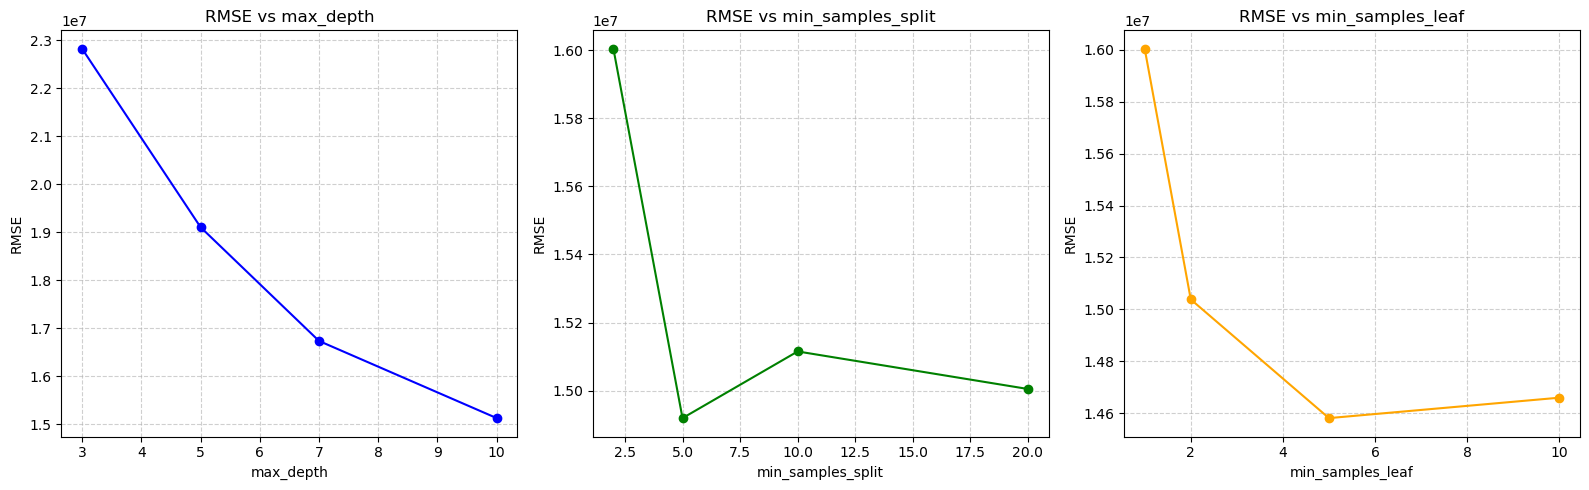

In [38]:
plt.figure(figsize=(16,5))

# --- Plot for max_depth ---
plt.subplot(1, 3, 1)
plt.plot(depth_values, rmse_depth, marker='o', color='blue')
plt.title("RMSE vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.grid(True, linestyle='--', alpha=0.6)

# --- Plot for min_samples_split ---
plt.subplot(1, 3, 2)
plt.plot(split_values, rmse_split, marker='o', color='green')
plt.title("RMSE vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("RMSE")
plt.grid(True, linestyle='--', alpha=0.6)

# --- Plot for min_samples_leaf ---
plt.subplot(1, 3, 3)
plt.plot(leaf_values, rmse_leaf, marker='o', color='orange')
plt.title("RMSE vs min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
